
# Workbook 4: Model Evaluation and Cross-Validation
## Pre-Class Activity

### Read

1. *An Introduction to Statistical Learning with Applications in R*:
   + "Chapter 5: Resampling Methods", from "Cross-Validation" (page 175) to "Bootstrap" (page 187)<font color="green"> $\longrightarrow$ Here, you will learn about an important resampling method, called cross-validation and its types applied to error estimation, model evaluation, and model selection.   
</font>
2. PDF presentation <font color="green"> $\longrightarrow$ This presentation provides a general introduction to model evaluation methods for regression and clustering, training vs test error, and different types of cross-validation.</font>   

3. *Python Data Science Handbook*: 

   3.1. "Hyper-parameters and Model Validation" (page 359) to the beginning of "Learning Curves"(page 370) <font color="green"> $\longrightarrow$ This part will provide you with some hands-on techniques to implement CV in Python and use it for different purposes.</font>

4. Notebook_04.ipython <font color="green"> $\longrightarrow$ Provides some hands-on exercises in Python, as well as relevant reading material.

## Train and Test Sets

In statistical learning, we usually split the dataset available into **two** parts:
  1. *training set*,
  2. *testing set*.

Traing set is a subset of the data that is used to learn the prameters of the assumed (usually, pre-specified) underlying model. This procedure is normally being referred to as *fitting the model*. Now, evaluating the performance of our statistical model must be measured on the testing set since using the same data for training the model and evaluating it will result in a **biased** evaluation of the predictive power of the model. Test set (sometimes, called *validation set*) can also help prevent *overfitting*. 

However, a better practice is to partition the dataset in 3 components: train, validation and test.

Simply speaking, overfitting (to train set) is characterized as dramatically better performance of the model applied to the train set in comparison to its performance on the test/validation set.


Here, we use *cross-validation* to train and evaluate a **logistic regression** classifier. Of course, a similar procedure can be used for any other classifier.

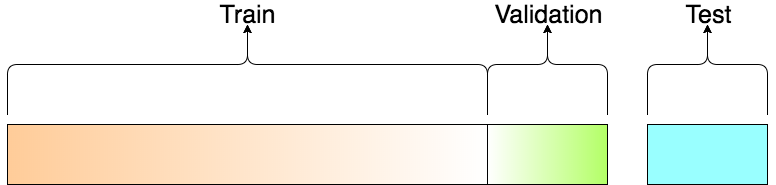

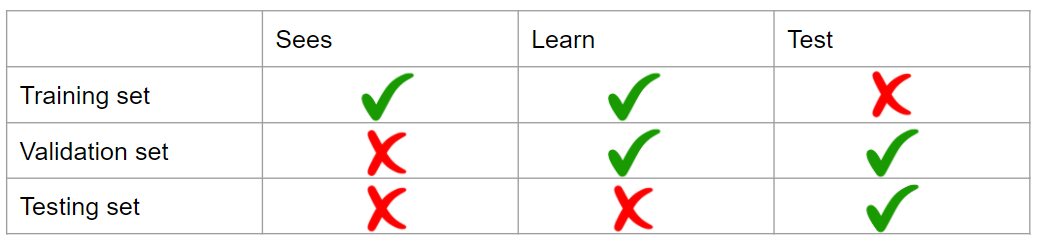

## Classification

Here we focus on three classifiers: logistic **regression, linear discriminant, and quadratic discriminant analysis**. We will apply each classifier in two steps:

- When there is only one predictor.
- When there are two or more predictors.

### Importing Libraries
In `scikit-learn` a **random** split into training and test sets can be performed with the `train_test_split` function. 

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from sklearn.model_selection import train_test_split

The digits dataset will be used here. One can download this dataset (**MNIST** dataset) directly from their site, however, this is one of the datasets that `scikit-learn` comes with. The code below will load the digits dataset.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits['data']     # features   digits.data gives the same result
digits['target']   # labels     digits.target gives the same result

digits['data'].shape     # features
digits['target'].shape   # labels

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

(1797, 64)

(1797,)

## Holdout Sample (Validation set) and Model Evaluation

Now, randomly select 75% of the sample for training and the rest will be reserved for testing (or evaluating) the classifier:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, 
                                                    random_state=0)

`shuffle`: boolean, optional (default=True)<br>
Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

`random_state`: int, RandomState instance or None, optional (default=None)<br>
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [ ]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((1347, 64), (1347,))

((450, 64), (450,))

In [ ]:
digits.target[0:10]
digits.target[10:20]
digits.target[30:40]
digits.target[40:50]
digits.target[100:110]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

array([8, 4, 1, 7, 7, 3, 5, 1, 0, 0])

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5])

Now, we will plot $10$ rows of the data, namely, rows $0,2,3,4,50,51,52,53,54$. To this end, we will use the built-in Python function `zip()`. Here is a small description of the function:

The `zip()` function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

If the passed iterators have different lengths, the iterator with least items decides the length of the new iterator.

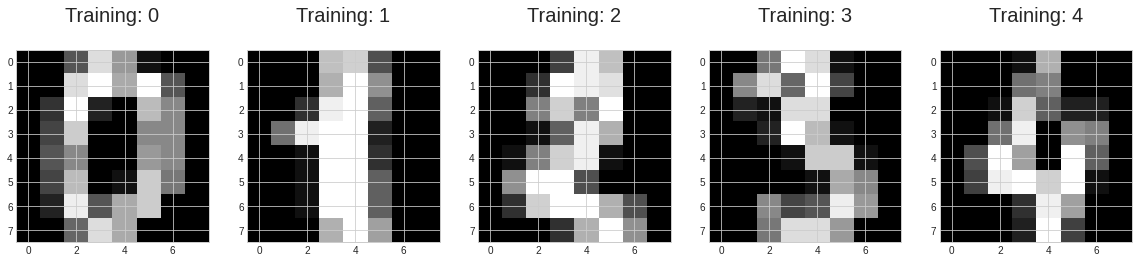

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
_ =  plt.figure(figsize=(20,4))


for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    subplot = plt.subplot(1, 5, index + 1)
    image = plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    title = plt.title('Training: %i\n' % label, fontsize = 20)

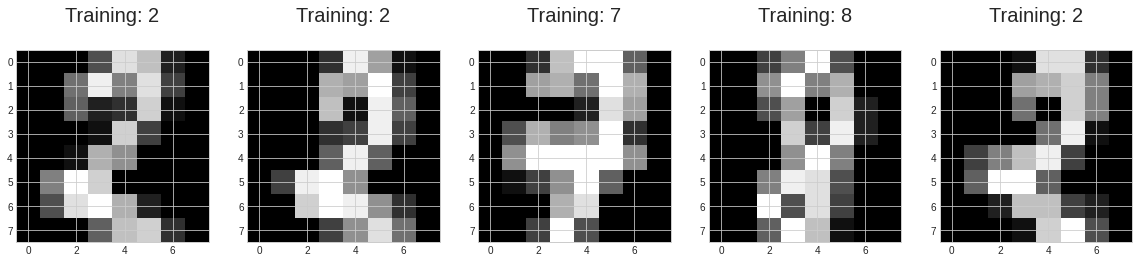

In [ ]:
_ =  plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[50:55], digits.target[50:55])):
    subplot = plt.subplot(1, 5, index + 1)
    image = plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    title = plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
logreg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = logreg.predict(X_test)
print('Contingency Table: \n')
confusion_matrix(y_test, y_predict)
print('\n Accuracy: ',accuracy_score(y_test, y_predict))
print('\n Classification Report: \n ',classification_report(y_test, y_predict)) # how precision and recall ca be defined for more than 2 classes?

Contingency Table: 



array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 45,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]])


 Accuracy:  0.9533333333333334

 Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Why *ConvergenceWarning*?

The default config is:

solver = 'lbfgs', 

multi_class = 'auto'

In [ ]:
y_predict = logreg2.predict(X_test)
print('Contingency Table: \n')
confusion_matrix(y_test, y_predict)
print('\n Accuracy: ',accuracy_score(y_test, y_predict))
print('\n Classification Report: \n ',classification_report(y_test, y_predict)) # how precision and recall ca be defined for more than 2 classes?

Contingency Table: 



array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])


 Accuracy:  0.9511111111111111

 Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



Nonetheless, the performance does not get affected much

Before moving onto the next part, we will have a quick look at some evaluation measures for classification.

## The scoring parameter: defining model evaluation rules

Model selection and evaluation using tools, such as `model_selection.GridSearchCV` and `model_selection.cross_val_score`, take a scoring parameter that controls what metric they apply to the estimators evaluated.

### Common cases: predefined values

For the most common use cases, you can designate a scorer object with the scoring parameter; the table below shows all possible values. All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like `metrics.mean_squared_error`, are available as `neg_mean_squared_error` which return the negated value of the metric. 

#### Classification
Scoring	| Function | Comment
----|----|----
‘accuracy’	| metrics.accuracy_score |  	 
‘balanced_accuracy’	| metrics.balanced_accuracy_score |	for binary targets
‘average_precision’	| metrics.average_precision_score    | 
‘f1’	| metrics.f1_score	| for binary targets
‘f1_micro’	| metrics.f1_score	| micro-averaged
‘f1_macro’	| metrics.f1_score	| macro-averaged
‘f1_weighted’	| metrics.f1_score	| weighted average
‘f1_samples’	| metrics.f1_score	| by multilabel sample
‘neg_log_loss’	| metrics.log_loss	| requires predict_proba support
‘precision’ etc.	| metrics.precision_score	| suffixes apply as with ‘f1’
‘recall’ etc.	| metrics.recall_score	| suffixes apply as with ‘f1’
‘roc_auc’	| metrics.roc_auc_score	 | 	 


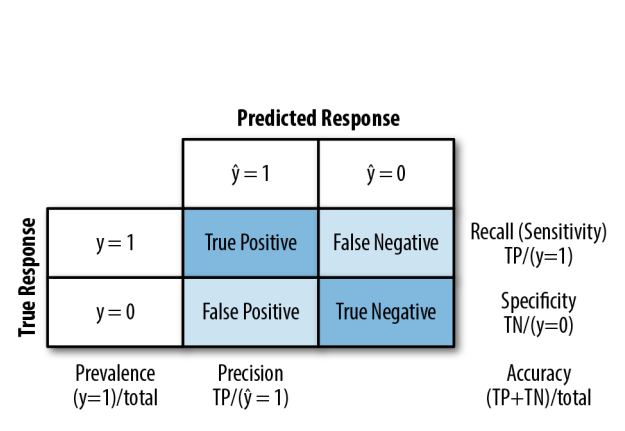

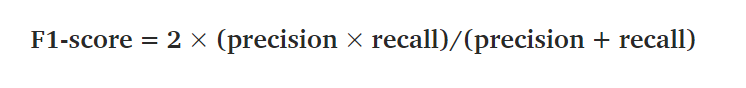

[Multi-class metrics](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)

## K-Fold Cross-Validation and Classification Accuracy

Each stimators have a **score** method providing a default evaluation criterion for the problem they are designed to solve. This is called *Estimator score method*. By *estimator* here we mean the model we use. For example, in the following cell logistic regression is the estimator. 

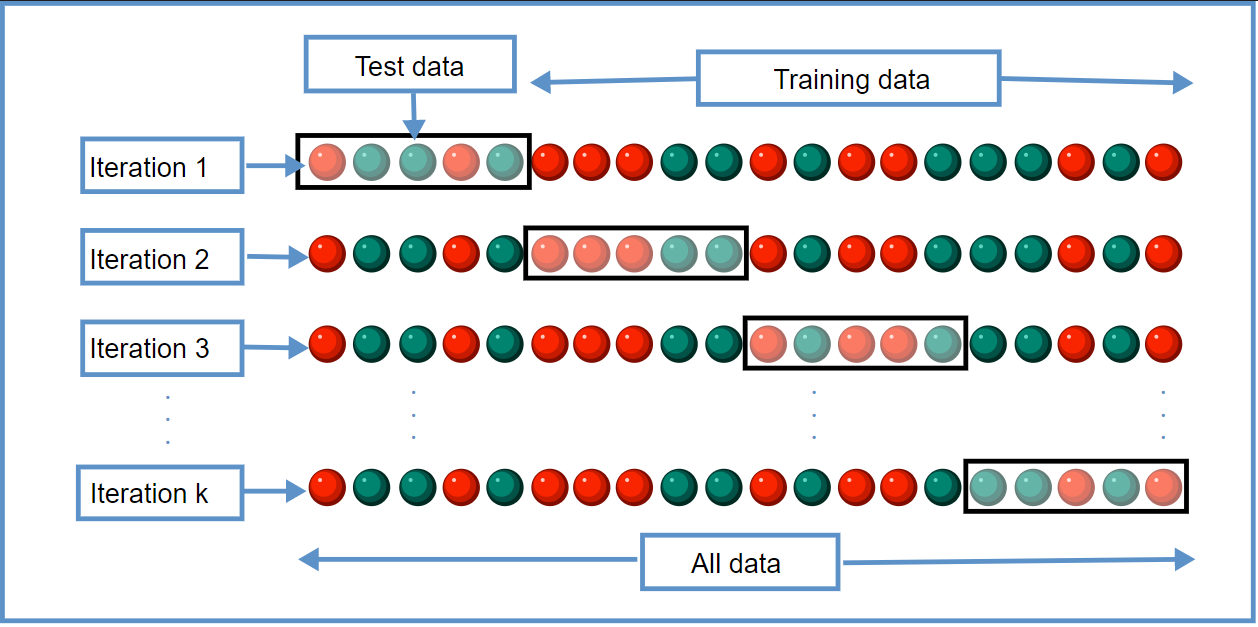

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_cv = cross_val_score(logreg, digits.data, digits.target, cv=7)
print('Accuracy in each iteration:\n')
for i in range(len(accuracy_cv)):
    print(accuracy_cv[i])

Accuracy in each iteration:

0.9182879377431906
0.9377431906614786
0.867704280155642
0.9571984435797666
0.980544747081712
0.92578125
0.88671875


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_cv.mean(), accuracy_cv.std() * 2))

Accuracy: 0.92 (+/- 0.07)


One can use, instead of the built-in score of the model, other measures of evaluation. To change the default scoring (evaluation) method we use the key words from the first column of the above table.

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
accuracy_cv2 = cross_val_score(logreg, digits.data, digits.target, cv=5, scoring='balanced_accuracy')
accuracy_cv2
print('Accuracy in each iteration:\n')
for i in range(len(accuracy_cv2)):
    print(accuracy_cv2[i])

array([0.92205062, 0.88332475, 0.95234941, 0.95800729, 0.89539468])

Accuracy in each iteration:

0.9220506220506219
0.8833247533247534
0.9523494082317612
0.9580072930072928
0.8953946803946803


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_cv2.mean(), accuracy_cv2.std() * 2))

Accuracy: 0.92 (+/- 0.06)


## K-Fold Cross-Validation and Tuning Parameter

Here, we use cross-validation to find the optimal tuning parameter in a binary classification problem using logistic regression. First, we select a subset of our data that contains only $0$ and $1$ labels:

In [ ]:
digits.target.shape

(1797,)

In [ ]:
# Concatenate data with labels for easier subsetting
digits_with_lab = np.concatenate((digits.data.copy(), digits.target.copy().reshape(1797,1)), axis = 1)
# Exptract only labels 0 and 1
keep_lab = [0,1]
keep_index = [x in keep_lab for x in digits_with_lab[:, 64]]
digits_binary = digits_with_lab[keep_index, :]

In [ ]:
digits_with_lab[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.,  2.])

In [ ]:
keep_index[0:10]

[True, True, False, False, False, False, False, False, False, False]

In [ ]:
# For the following thresholds logreg model will be fitted using k-fold CV
decision_threshold = [.2, .4,.5,.6,.8]

In [ ]:
X = digits_binary[:,:64]
y = digits_binary[:,64]

In [ ]:
X.shape

(360, 64)

In [ ]:
from sklearn.model_selection import KFold

k = 7
kf = KFold(n_splits = k)
# kf.get_n_splits(X)
X = digits_binary[:,:64]
y = digits_binary[:,64]

# For each decision_threshold the following must be done
threshold_mean_accuracy =  np.zeros(len(decision_threshold)) # mean accuracy of each threshold
for i in range(len(decision_threshold)):
    threshold = decision_threshold[i]
    print('Threshold: ', threshold)
    accuracy0 = 0
    
    for train_index, test_index in kf.split(digits_binary):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        
        predicts = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)
        accuracy = accuracy_score(y_test, predicts)
        accuracy0 = accuracy0 + accuracy





        
    threshold_mean_accuracy[i] = accuracy0/k
    print('Threshold mean accuracy: ' , threshold_mean_accuracy[i], '\n')

Threshold:  0.2


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Threshold mean accuracy:  1.0 

Threshold:  0.4


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Threshold mean accuracy:  0.9971988795518207 

Threshold:  0.5


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Threshold mean accuracy:  0.9971988795518207 

Threshold:  0.6


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Threshold mean accuracy:  0.9971988795518207 

Threshold:  0.8


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Threshold mean accuracy:  0.9943977591036415 



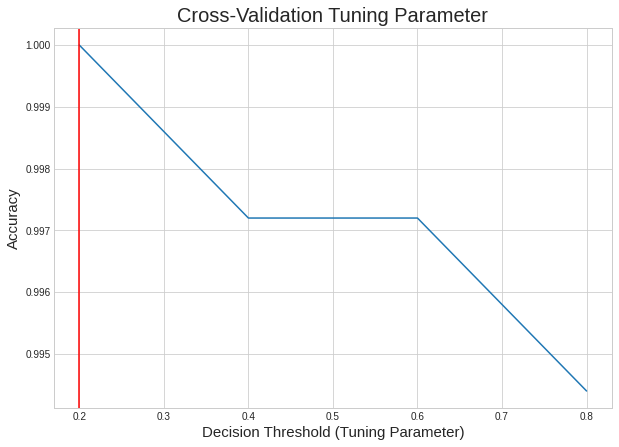

In [ ]:
size = plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plot = plt.plot(decision_threshold, threshold_mean_accuracy);
hline = plt.axvline(x= decision_threshold[np.argmax(threshold_mean_accuracy)], c='r')
xlab = plt.xlabel('Decision Threshold (Tuning Parameter)',fontsize = 15)
ylab = plt.ylabel('Accuracy',fontsize = 15)
title = plt.title('Cross-Validation Tuning Parameter',fontsize = 20)

In [ ]:
logreg.predict_proba(X_test)
plt.hist(logreg.predict_proba(X_test)[:,1])